# Get scholia data for diseases that are possibly related to schizophrenia

### first get overview: what data do we get from sparql request:
* count
* gene_count (shows importance of relation(?!))
* symptom_count
* disease
* diseaseLabel
* genes
* symptoms

In [5]:
import SPARQLWrapper

sparql = SPARQLWrapper.SPARQLWrapper("https://query.wikidata.org/sparql")

query = '''
PREFIX target: <http://www.wikidata.org/entity/Q41112>

SELECT
  ?count
  ?gene_count
  ?symptom_count
  ?disease ?diseaseLabel
  ?genes
  ?symptoms
{
  {
    SELECT ?disease (COUNT(?gene) AS ?gene_count) (GROUP_CONCAT(?gene_label; separator=" // ") AS ?genes) WHERE {
      target: wdt:P2293 ?gene .
      ?gene wdt:P2293 ?disease .
      FILTER (target: != ?disease)
      ?gene rdfs:label ?gene_label
      FILTER(lang(?gene_label) = "en")
    }
    GROUP BY ?disease
  }
  UNION
  {
    SELECT
      ?disease (COUNT(?symptom) AS ?symptom_count) (GROUP_CONCAT(?symptom_label; separator=" // ") AS ?symptoms)
    {
      target: wdt:P780 ?symptom .
      ?disease wdt:P780 ?symptom .
      FILTER (target: != ?disease)
      ?symptom rdfs:label ?symptom_label . FILTER(lang(?symptom_label) = "en")
    }
    GROUP BY ?disease
  }

  # Aggregate count
  BIND((COALESCE(?symptom_count, 0) + COALESCE(?gene_count, 0)) AS ?count)

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
ORDER BY DESC(?count)
'''

# Set the query language to SPARQL
sparql.setQuery(query)

# Set the return format to JSON
sparql.setReturnFormat(SPARQLWrapper.JSON)

# Execute the query and store the results
results = sparql.query().convert()

for disease in results['results']['bindings']:
    for key, value in disease.items():
        print(key)
        print(value['value'])

disease
http://www.wikidata.org/entity/Q131755
diseaseLabel
bipolar disorder
count
14
gene_count
14
genes
NPAS3 // CACNA1C // MSRA // ANK3 // PTPRN2 // IFT88 // KCNMB2 // NLRC5 // COMMD10 // RIN2 // MYO18B // PHF8 // CNTNAP2 // ERC2
disease
http://www.wikidata.org/entity/Q12174
diseaseLabel
obesity
count
5
gene_count
5
genes
PTPRN2 // CSMD1 // RIN2 // CNTNAP2 // CTNNA3
disease
http://www.wikidata.org/entity/Q4340209
diseaseLabel
mental depression
count
5
gene_count
5
genes
NPAS3 // CDH13 // RORA // IFT88 // MYO18B
disease
http://www.wikidata.org/entity/Q11081
diseaseLabel
Alzheimer's disease
count
5
gene_count
5
genes
RELN // CACNA1G // CSMD1 // NKAIN2 // CNTNAP2
disease
http://www.wikidata.org/entity/Q520127
diseaseLabel
periodontitis
count
4
gene_count
4
genes
CDH13 // CSMD1 // NKAIN2 // ERC2
disease
http://www.wikidata.org/entity/Q35869
diseaseLabel
asthma
count
3
gene_count
3
genes
NOTCH4 // RORA // CTNNA3
disease
http://www.wikidata.org/entity/Q55950055
diseaseLabel
unipolar depre

### make circos plot to show the relation between the diseases

In [2]:
import pycircos

# Daten vorbereiten
data = [("A", "B", 5), ("B", "C", 3), ("C", "D", 2), ("D", "E", 4)]

# Circos-Plot erstellen
fig, ax = pycircos.plot(data)

# Plot anzeigen
pycircos.show()


AttributeError: module 'pycircos' has no attribute 'plot'

In [3]:
import pycircos
import matplotlib.pyplot as plt
Tarc    = pycircos.Tarc
Tcircle = pycircos.Tcircle

In [4]:
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [ ]:
#Set chromosomes
circle = Gcircle(figsize=(8,8))
with open("sample_data/example_data_chromosome_general.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",")
        name   = line[0]
        length = int(line[-1])
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)
        circle.add_garc(arc)

name = diseaseLabel
length =
arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)


In [7]:
# disease labels

disease_labels = []

for disease in results['results']['bindings']:
    for key, value in disease.items():
        if key == 'diseaseLabel':
            disease_labels.append(value['value'])
print(disease_labels)

['bipolar disorder', 'obesity', 'mental depression', "Alzheimer's disease", 'periodontitis', 'asthma', 'unipolar depression', 'major depressive disorder', 'coronary artery disease', 'amyotrophic lateral sclerosis', 'morbid obesity', 'multiple sclerosis', 'gaming disorder', 'heroin dependence', 'vitamin B12 deficiency', 'cognitive disorder', 'premenstrual dysphoric disorder', 'Rett syndrome', 'COVID-19', 'exposure to soluble thallium compounds', 'tetraethyllead exposure', 'carbon disulfide exposure', 'delirium', 'arrhythmogenic right ventricular dysplasia 13', 'nicotine dependence', 'dental caries', 'syndromic X-linked intellectual disability Siderius type', 'hereditary spastic paraplegia 45', 'celiac disease', 'Klippel-Feil anomaly-myopathy-facial dysmorphism syndrome', 'renal hypomagnesemia 6', 'intracranial aneurysm', 'RIN2 syndrome', 'smallpox', 'Bardet-Biedl syndrome 16', 'autosomal dominant mental retardation 47', 'lymphoblastic leukemia', 'spinocerebellar ataxia type 42', 'myopia

In [9]:
# arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)

circle = Gcircle(figsize=(8,8))

for name in disease_labels:
    arc = Garc(arc_id=name)
    circle.add_garc(arc)

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [13]:
circle.set_garcs(-65,245)

for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=name)

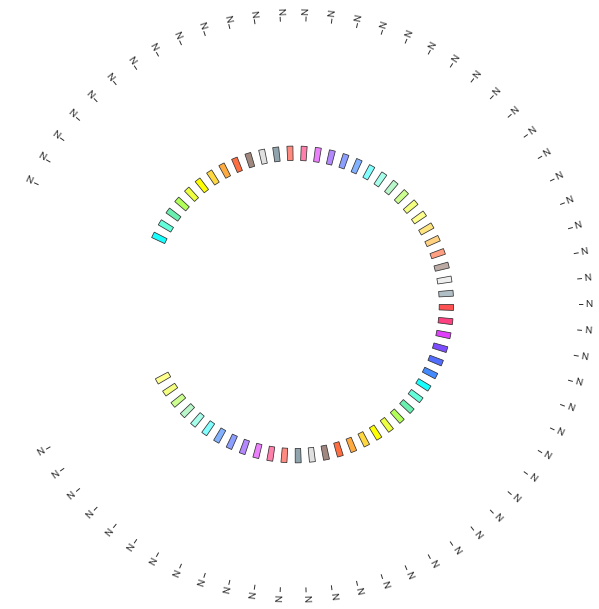

In [14]:
circle.figure

In [15]:
# disease labels

symptom_count = []

for disease in results['results']['bindings']:
    for key, value in disease.items():
        if key == 'symptom_count':
            symptom_count.append(value['value'])
print(symptom_count)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


In [16]:
# get entity id numbers for every disease

for disease in results['results']['bindings']:
    for key, value in disease.items():
        if key == 'disease':
            splitted_uri = key.split('/')
            entity_id = splitted_uri[-1]

print(results_dict)

{'disease': 'http://www.wikidata.org/entity/Q130555', 'diseaseLabel': 'Norman–Roberts syndrome', 'count': '1', 'gene_count': '1', 'genes': 'RELN', 'symptom_count': '1', 'symptoms': 'psychosis'}


In [17]:
print(results['results']['bindings'])

[{'disease': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q131755'}, 'diseaseLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'bipolar disorder'}, 'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '14'}, 'gene_count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '14'}, 'genes': {'type': 'literal', 'value': 'NPAS3 // CACNA1C // MSRA // ANK3 // PTPRN2 // IFT88 // KCNMB2 // NLRC5 // COMMD10 // RIN2 // MYO18B // PHF8 // CNTNAP2 // ERC2'}}, {'disease': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q12174'}, 'diseaseLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'obesity'}, 'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '5'}, 'gene_count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'type': 'literal', 'value': '5'}, 'genes': {'type': 'literal', 'value': 'PTPRN2 // CSMD1 // RIN2 // CNTNAP2 // CTNNA3'}}, {'disease':

In [31]:
result_list = results['results']['bindings']
for lalala in result_list:
    # print(lalala)
    for key, value in lalala.items():
        key = key
        # value.pop('type').pop('datatype').pop('x')
        print(value)

        #for keyyy in value.keys():
         #   if keyyy != 'value':
          #      value.pop('keyyy')


print(result_list)

{'value': 'http://www.wikidata.org/entity/Q131755'}
{'xml:lang': 'en', 'value': 'bipolar disorder'}
{'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '14'}
{'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '14'}
{'value': 'NPAS3 // CACNA1C // MSRA // ANK3 // PTPRN2 // IFT88 // KCNMB2 // NLRC5 // COMMD10 // RIN2 // MYO18B // PHF8 // CNTNAP2 // ERC2'}
{'value': 'http://www.wikidata.org/entity/Q12174'}
{'xml:lang': 'en', 'value': 'obesity'}
{'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '5'}
{'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '5'}
{'value': 'PTPRN2 // CSMD1 // RIN2 // CNTNAP2 // CTNNA3'}
{'value': 'http://www.wikidata.org/entity/Q4340209'}
{'xml:lang': 'en', 'value': 'mental depression'}
{'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '5'}
{'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '5'}
{'value': 'NPAS3 // CDH13 // RORA // IFT88 // MYO18B'}
{'value': 'http://www.wikid

In [52]:
cleaned_dict = {}

entities = []
result_list = results['results']['bindings']
for count, res in enumerate(result_list):
    #print(count, res)
    for res_key, res_value in res.items():
        if res_key == 'disease':
            uri = res_value['value']
            splitted_uri = uri.split('/')
            entity_id = splitted_uri[-1]
            entities.append(entity_id)
    cleaned_dict[entity_id] = res
        # cleaned_val = res_value['value']
        # cleaned_dict[count] = {cleaned_dict[cleaned_key] : cleaned_val}
        # cleaned_dict[cleaned_key] = None
        #print(res_value)
        #cleaned_dict[cleaned_key] = res_value



# print(result_list)
# print(entities)
print(cleaned_dict)

{'Q131755': {'disease': {'value': 'http://www.wikidata.org/entity/Q131755'}, 'diseaseLabel': {'xml:lang': 'en', 'value': 'bipolar disorder'}, 'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '14'}, 'gene_count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '14'}, 'genes': {'value': 'NPAS3 // CACNA1C // MSRA // ANK3 // PTPRN2 // IFT88 // KCNMB2 // NLRC5 // COMMD10 // RIN2 // MYO18B // PHF8 // CNTNAP2 // ERC2'}}, 'Q12174': {'disease': {'value': 'http://www.wikidata.org/entity/Q12174'}, 'diseaseLabel': {'xml:lang': 'en', 'value': 'obesity'}, 'count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '5'}, 'gene_count': {'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '5'}, 'genes': {'value': 'PTPRN2 // CSMD1 // RIN2 // CNTNAP2 // CTNNA3'}}, 'Q4340209': {'disease': {'value': 'http://www.wikidata.org/entity/Q4340209'}, 'diseaseLabel': {'xml:lang': 'en', 'value': 'mental depression'}, 'count': {'datatype': 'http:

In [57]:
entity_list = []
columns = []
data = []

for key, value in cleaned_dict.items():
    # print(key)
    entity_list.append(key)
    # print(value)

    for value_k, value_v in value.items():
        # print(value_k)
        columns.append(value_k)
        # print(value_v['value'])
        data.append(value_v['value'])
print(entity_list)
print(columns)
print(data)

['Q131755', 'Q12174', 'Q4340209', 'Q11081', 'Q520127', 'Q35869', 'Q55950055', 'Q42844', 'Q844935', 'Q206901', 'Q9051491', 'Q8277', 'Q49000071', 'Q18558272', 'Q3234995', 'Q3065932', 'Q2728811', 'Q917357', 'Q84263196', 'Q21175356', 'Q21175349', 'Q3964296', 'Q160796', 'Q27164447', 'Q18553444', 'Q133772', 'Q28065616', 'Q32143061', 'Q11088', 'Q55784933', 'Q32136733', 'Q1198391', 'Q55783958', 'Q12214', 'Q27674842', 'Q53660491', 'Q18553852', 'Q55345906', 'Q168403', 'Q28065627', 'Q2757585', 'Q1164529', 'Q55784936', 'Q181923', 'Q5340515', 'Q830308', 'Q180913', 'Q41861', 'Q27677684', 'Q3508705', 'Q50349648', 'Q18553536', 'Q945238', 'Q18554727', 'Q1464888', 'Q1164401', 'Q1477', 'Q3589154', 'Q756610', 'Q130555']
['disease', 'diseaseLabel', 'count', 'gene_count', 'genes', 'disease', 'diseaseLabel', 'count', 'gene_count', 'genes', 'disease', 'diseaseLabel', 'count', 'gene_count', 'genes', 'disease', 'diseaseLabel', 'count', 'gene_count', 'genes', 'disease', 'diseaseLabel', 'count', 'gene_count', 'ge

In [59]:
dictionary = dict(zip(columns, data))
print(dictionary)

{'disease': 'http://www.wikidata.org/entity/Q130555', 'diseaseLabel': 'Norman–Roberts syndrome', 'count': '1', 'gene_count': '1', 'genes': 'RELN', 'symptom_count': '1', 'symptoms': 'psychosis'}


In [61]:
final_dict = {}
for a, b in dictionary.items():
    for ent in entity_list:

        final_dict[ent] = {a, b}

print(final_dict)

{'Q131755': {'symptoms', 'psychosis'}, 'Q12174': {'symptoms', 'psychosis'}, 'Q4340209': {'symptoms', 'psychosis'}, 'Q11081': {'symptoms', 'psychosis'}, 'Q520127': {'symptoms', 'psychosis'}, 'Q35869': {'symptoms', 'psychosis'}, 'Q55950055': {'symptoms', 'psychosis'}, 'Q42844': {'symptoms', 'psychosis'}, 'Q844935': {'symptoms', 'psychosis'}, 'Q206901': {'symptoms', 'psychosis'}, 'Q9051491': {'symptoms', 'psychosis'}, 'Q8277': {'symptoms', 'psychosis'}, 'Q49000071': {'symptoms', 'psychosis'}, 'Q18558272': {'symptoms', 'psychosis'}, 'Q3234995': {'symptoms', 'psychosis'}, 'Q3065932': {'symptoms', 'psychosis'}, 'Q2728811': {'symptoms', 'psychosis'}, 'Q917357': {'symptoms', 'psychosis'}, 'Q84263196': {'symptoms', 'psychosis'}, 'Q21175356': {'symptoms', 'psychosis'}, 'Q21175349': {'symptoms', 'psychosis'}, 'Q3964296': {'symptoms', 'psychosis'}, 'Q160796': {'symptoms', 'psychosis'}, 'Q27164447': {'symptoms', 'psychosis'}, 'Q18553444': {'symptoms', 'psychosis'}, 'Q133772': {'symptoms', 'psychosi

In [62]:
dict_list = [{key : value} for key, value in dictionary.items()]

print(dict_list)

[('disease', 'http://www.wikidata.org/entity/Q130555'), ('diseaseLabel', 'Norman–Roberts syndrome'), ('count', '1'), ('gene_count', '1'), ('genes', 'RELN'), ('symptom_count', '1'), ('symptoms', 'psychosis')]


In [66]:
nested_dict = dict(zip(entity_list, dict_list))
print(nested_dict)

{'Q131755': ('disease', 'http://www.wikidata.org/entity/Q130555'), 'Q12174': ('diseaseLabel', 'Norman–Roberts syndrome'), 'Q4340209': ('count', '1'), 'Q11081': ('gene_count', '1'), 'Q520127': ('genes', 'RELN'), 'Q35869': ('symptom_count', '1'), 'Q55950055': ('symptoms', 'psychosis')}
